In [238]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import STOCH, EMA

In [229]:
data = yf.download("AAPL", start="2020-1-10", end="2022-10-10")

[*********************100%***********************]  1 of 1 completed


In [230]:
# ref --> https://stackoverflow.com/questions/28477222/python-pandas-calculate-ichimoku-chart-components
def ichimoku_cloud(df,tenkansen_value = 9, kinjunsen_value = 26, shift_value = 26, senkou_b_value = 52):
        '''
        Get the values of Lines for Ichimoku Cloud
        args:
            df: Dataframe
        '''
        # Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2))
        period9_high = d['High'].rolling(window=tenkansen_value).max()
        period9_low = d['Low'].rolling(window=tenkansen_value).min()
        tenkan_sen = (period9_high + period9_low) / 2

        # Kijun-sen (Base Line): (26-period high + 26-period low)/2))
        period26_high = d['High'].rolling(window=kinjunsen_value).max()
        period26_low = d['Low'].rolling(window=kinjunsen_value).min()
        kijun_sen = (period26_high + period26_low) / 2

        # Senkou Span A (Leading Span A): (Conversion Line + Base Line)/2))
        senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(shift_value)

        # Senkou Span B (Leading Span B): (52-period high + 52-period low)/2))
        period52_high = d['High'].rolling(window=senkou_b_value).max()
        period52_low = d['Low'].rolling(window=senkou_b_value).min()
        senkou_span_b = ((period52_high + period52_low) / 2).shift(shift_value)

        # The most current closing price plotted 22 time periods behind (optional)
        # chikou_span = d['Close'].shift(-26) # Given at Trading View.

        # d['blue_line'] = tenkan_sen
        # d['red_line'] = kijun_sen
        d['cloud_green_line_a'] = senkou_span_a
        d['cloud_red_line_b'] = senkou_span_b
        # d['lagging_line'] = chikou_span
        return d

In [234]:
d = ichimoku_cloud(data)
d.tail()
# d = ich(data)

,Open,High,Low,Close,Adj Close,Volume,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,cloud_green_line_a,cloud_red_line_b
Date,,,,,,,,,,,,
2022-10-03,138.210007,143.070007,137.690002,142.449997,142.449997,114311700,148.215004,154.370003,167.337498,152.594994,167.337498,152.594994
2022-10-04,145.029999,146.220001,144.259995,146.100006,146.100006,87830100,146.205002,150.974998,166.664997,152.594994,166.664997,152.594994
2022-10-05,144.070007,147.380005,143.009995,146.399994,146.399994,79471000,146.205002,150.974998,165.730000,152.594994,165.730000,152.594994
2022-10-06,145.809998,147.539993,145.220001,145.429993,145.429993,68402200,146.205002,150.974998,164.892498,152.594994,164.892498,152.594994
2022-10-07,142.539993,143.100006,139.449997,140.089996,140.089996,85859100,146.205002,150.974998,164.797501,152.979996,164.797501,152.979996


In [232]:
import matplotlib.pyplot as plt

In [239]:
slowk, slowd = STOCH(data['High'], data['Low'], data['Close'])

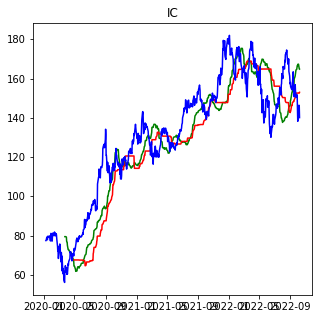

In [243]:
fig = plt.figure(figsize=(5, 5))
plt.title('IC')

plt.plot(d['cloud_green_line_a'], 'g', label='senkou_span_a')
plt.plot(d['cloud_red_line_b'], 'r', label='senkou_span_b')
plt.plot(d['Close'], 'b', label='close')


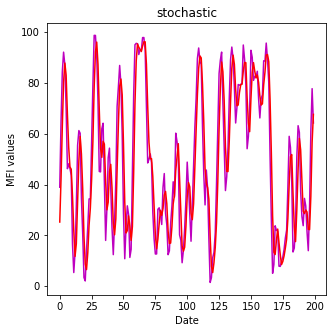

In [244]:
fig = plt.figure(figsize=(5, 5))
plt.title('stochastic')
plt.xlabel('Date')
plt.ylabel('MFI values')

plt.plot(slowk[-200:], 'm', label='slowk')
plt.plot(slowd[-200:], 'r', label='slowd')

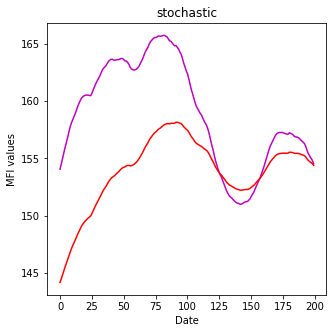

In [245]:
ema100 = EMA(data['Close'],100)
ema200 = EMA(data['Close'],200)
fig = plt.figure(figsize=(5, 5))
plt.title('stochastic')
plt.xlabel('Date')
plt.ylabel('MFI values')

plt.plot(ema100[-200:], 'm', label='ema100')
plt.plot(ema200[-200:], 'r', label='ema200')

In [296]:
d['cloud_green_line_a'][-10:]

Date
2022-09-26    164.699997
2022-09-27    165.562496
2022-09-28    166.474995
2022-09-29    166.464996
2022-09-30    167.229996
2022-10-03    167.337498
2022-10-04    166.664997
2022-10-05    165.730000
2022-10-06    164.892498
2022-10-07    164.797501
Name: cloud_green_line_a, dtype: float64

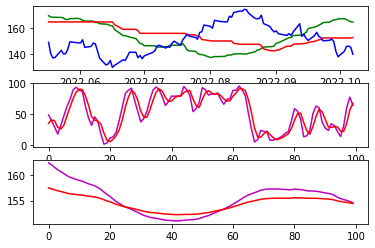

In [302]:
plt.subplot(3, 1, 1)
plt.plot(d['cloud_green_line_a'][-100:], 'g', label='senkou_span_a')
plt.plot(d['cloud_red_line_b'][-100:], 'r', label='senkou_span_b')
plt.plot(d['Close'][-100:], 'b', label='close')

plt.subplot(3, 1, 2)
plt.plot(slowk[-100:], 'm', label='slowk')
plt.plot(slowd[-100:], 'r', label='slowd')


plt.subplot(3, 1, 3)
plt.plot(ema100[-100:], 'm', label='ema100')
plt.plot(ema200[-100:], 'r', label='ema200')

plt.show()